# Importing dataset directly from Kaggle into Colab

In [3]:
# Code to import dataset directly from Kaggle into Colab
# Need to have Kaggle user name and API token key (which may expire so new API token key might need to be generated)

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yellowj4acket/real-estate-california")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedimtiazmir
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yellowj4acket/real-estate-california


100%|██████████| 11.4M/11.4M [00:00<00:00, 102MB/s] 

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
data = pd.read_csv('/content/real-estate-california/RealEstate_California.csv')

data.head()



,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [6]:
# info about dataset
data.shape

(35389, 39)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  int64  
 8   is_forAuction       35389 non-null  int64  
 9   event               35100 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

# Identifying columns to be dropped
1. Columns which have data that have no relevance to price prediction e.g. Serial # (Unnamed: 0), id
2. Columns which have duplicate information e.g. countyId, cityId
3. Columns which have only one value in the dataset
4. Columns which only have limited value instances e.g. is_bankOwned

In [38]:
# Initialize an empty list to store column names to drop
columns_to_drop = []

# Dropping irrelevant columns
columns_to_drop.extend(['Unnamed: 0', 'id'])

# Dropping duplicate columns
columns_to_drop.extend(['countyId', 'cityId'])

# Identify columns with only one unique value
one_unique_col = []

for column in data.columns:
    if data[column].nunique() == 1:
        one_unique_col.append((column, data[column].nunique()))
        columns_to_drop.append(column)

# Print columns with only one unique value and the count of unique values
print("Columns to drop (having only one unique value):")
for column, unique_count in one_unique_col:
    print(f"Column: {column}, Unique Values: {unique_count}")
print("\n")


# Check for differences between 'livingArea' and 'livingAreaValue'
difference = data['livingArea'] != data['livingAreaValue']

# Count the number of rows where the values are different
num_differences = difference.sum()
print(f"Number of rows with differences b/w livingArea and livingAreaValue columns: {num_differences}")

# Display the rows where the values are different
rows_with_differences = data[difference]
print(rows_with_differences[['livingArea', 'livingAreaValue']])
print("\n")
# Drop the 'livingAreaValue' column
columns_to_drop.append('livingArea')  # since livingArea is missing an entry compared to livingAreaValue

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Columns to drop (having only one unique value):
Column: stateId, Unique Values: 1
Column: country, Unique Values: 1
Column: state, Unique Values: 1
Column: currency, Unique Values: 1


Number of rows with differences b/w livingArea and livingAreaValue columns: 1
       livingArea  livingAreaValue
34975         0.0       26210.0965


Number of duplicate street addresses: 4259
                      streetAddress
17     7137 Coldwater Canyon Ave #6
18                    7823 Lemp Ave
19                   12421 Stagg St
20                 7815 Simpson Ave
21               7706 Wilkinson Ave
...                             ...
35343                  644 Cedar Ln
35344                    0 North Rd
35363    600 S Ridgeley Dr UNIT 104
35386                115 Clinton St
35387              415 Caledonia St

[8470 rows x 1 columns]

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'countyId', 'cityId', 'stateId', 'country', 'state', 'currency', 'livingArea']




In [9]:
# Identify columns with limited unique values and their counts
LIMITED_UNIQUE = 10             # constant to define how many unique values we may want to consider
limited_unique_col = []
limited_unique_col_counts = {} #dictionary to store column names and their unique values

for column in data.columns:
    if data[column].nunique() > 1 and data[column].nunique() < LIMITED_UNIQUE:
        limited_unique_col.append((column, data[column].nunique()))
        unique_values_counts = data[column].value_counts()
        limited_unique_col_counts[column] = unique_values_counts



print("="*50)

# Print columns with fewer than LIMITED_UNIQUE values and the count of unique values
print(f"\nColumns with fewer than {LIMITED_UNIQUE} unique values:")
for column, unique_count in limited_unique_col:
  print(f"Column: {column}, Unique Values: {unique_count}")

print("\n" + "="*50 + "\n\n")
# Print the unique values and their counts for columns with fewer than COUNT_INSTANCES values
COUNT_INSTANCES = 50
print(f"Unique values and their counts for columns with fewer than {COUNT_INSTANCES} unique values:\n")
for column, unique_values_counts in limited_unique_col_counts.items():
  if (unique_values_counts < COUNT_INSTANCES).any():
    print(f"Column: {column}")
    print(unique_values_counts)
    #print(unique_values_counts.sum())
    print("="*50)



Columns with fewer than 10 unique values:
Column: is_bankOwned, Unique Values: 2
Column: is_forAuction, Unique Values: 2
Column: event, Unique Values: 6
Column: hasBadGeocode, Unique Values: 2
Column: lotAreaUnits, Unique Values: 2
Column: parking, Unique Values: 2
Column: hasGarage, Unique Values: 2
Column: pool, Unique Values: 2
Column: spa, Unique Values: 2
Column: isNewConstruction, Unique Values: 2
Column: hasPetsAllowed, Unique Values: 2
Column: homeType, Unique Values: 6



Unique values and their counts for columns with fewer than 50 unique values:

Column: is_bankOwned
is_bankOwned
0    35386
1        3
Name: count, dtype: int64
Column: is_forAuction
is_forAuction
0    35363
1       26
Name: count, dtype: int64
Column: event
event
Listed for sale    24622
Price change        4893
Listing removed     4311
Sold                1268
Listed for rent        5
Pending sale           1
Name: count, dtype: int64
Column: hasBadGeocode
hasBadGeocode
0    35386
1        3
Name: count, dt

In [10]:
# Using output from above eliminating columns that have limited number of unique instances
# these include is_bankOwned, is_forAuction, hasBadGeocode

columns_to_drop.extend(['is_bankOwned', 'is_forAuction', 'hasBadGeocode'])
print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")



Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'countyId', 'cityId', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode']




In [11]:
# Drop those columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Show the cleaned dataset with the columns dropped
print("Dataset after dropping columns based an analysis:")
print(data_cleaned.head())

Dataset after dropping columns based an analysis:
  datePostedString            event          time     price  \
0       2021-01-13  Listed for sale  1.610496e+12  145000.0   
1       2021-07-12  Listed for sale  1.626048e+12  675000.0   
2       2021-07-08  Listed for sale  1.625702e+12  649000.0   
3       2021-07-07  Listed for sale  1.625616e+12  599000.0   
4       2021-07-07  Listed for sale  1.625616e+12  299000.0   

   pricePerSquareFoot      city  yearBuilt     streetAddress  zipcode  \
0                 0.0  Gold Run          0  0 Moody Ridge Rd  95717.0   
1               404.0    Pinole       1958    1476 Belden Ct  94564.0   
2               459.0    Pinole       1959   3540 Savage Ave  94564.0   
3               448.0    Pinole       1908      2391 Plum St  94564.0   
4                 0.0    Pinole          0   2693 Appian Way  94564.0   

    longitude  ...  parking garageSpaces  hasGarage     levels pool  spa  \
0 -120.834473  ...        0          0.0          0     

# Cleaning Rows

After dropping columns, next step is to clean the rows.

This would include the following:
* Identify duplicate rows using duplicated street addresses
* Identify rows whose values need to be updated e.g.
  1. Column "homeType" has one row which has value "APARTMENT" --> this should be changed to "MULTI_FAMILY"
  2. Column event has 5 rows which has value "Listed for rent"
* Identify rows where price (intended model output) is missing --> these rows should be deleted
*





In [44]:
# Identify duplicate entries in the 'streetAddress' column
duplicates = data_cleaned['streetAddress'].duplicated(keep=False)  # keep=False shows all duplicates

# Print the index and streetAddress for rows with duplicates
duplicate_entries = data_cleaned[duplicates][['streetAddress']]

# Count the number of duplicate entries in 'streetAddress'
num_duplicates = data_cleaned['streetAddress'].duplicated().sum()
print(f"Number of duplicate street addresses: {num_duplicates}")

# Print the index and streetAddress
print(duplicate_entries)

# Remove duplicate street addresses and keep only the first occurrence
data_cleaned = data_cleaned.drop_duplicates(subset='streetAddress', keep='first')

data_cleaned.info()

Number of duplicate street addresses: 0
Empty DataFrame
Columns: [streetAddress]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 30906 entries, 0 to 35388
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datePostedString    30904 non-null  object 
 1   event               30906 non-null  object 
 2   time                30906 non-null  float64
 3   price               30906 non-null  float64
 4   pricePerSquareFoot  30906 non-null  float64
 5   city                30906 non-null  object 
 6   yearBuilt           30906 non-null  int64  
 7   streetAddress       30905 non-null  object 
 8   zipcode             30884 non-null  float64
 9   longitude           30906 non-null  float64
 10  latitude            30906 non-null  float64
 11  description         30669 non-null  object 
 12  livingArea          30906 non-null  float64
 13  livingAreaValue     30906 non-null  float64
 14  lotAreaUnits    

In [12]:
# Identify columns with missing values

# Identify columns with missing values
missing_values = data_cleaned.isnull().sum()

# Filter the columns that have missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print the columns with missing values and the count of missing values
print("Columns with missing values and counts of missing values:")
print(columns_with_missing_values)

Columns with missing values and counts of missing values:
datePostedString      3
event               289
time                289
streetAddress         1
zipcode              25
description         279
dtype: int64


In [13]:
# Identify instances of rows which have no price listed

# First ensure that all values in the 'price' column are converted to numeric
data_cleaned['price'] = pd.to_numeric(data['price'], errors='coerce')

# Identify count of rows with missing values or ZERO values in the 'price' column
no_price = data_cleaned[data_cleaned['price'].isna() | (data_cleaned['price'] == 0) | (data_cleaned['price'] < 100)]

# Print count of no_price
print("Count of rows with no price listed:")
print(len(no_price))  # Print the count of rows with no price listed



Count of rows with no price listed:
320


In [14]:
# Drop rows with zero price
data_cleaned.drop(data_cleaned[data_cleaned['price'] == 0].index, inplace=True)
data_cleaned.drop(data_cleaned[data_cleaned['price'] == 1].index, inplace=True)


In [15]:
# Get the describe output as a DataFrame
desc_stats = data_cleaned.describe()

# Apply formatting to the interested columns
desc_stats['price'] = desc_stats['price'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['livingArea'] = desc_stats['livingArea'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['bedrooms'] = desc_stats['bedrooms'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['bathrooms'] = desc_stats['bathrooms'].apply(lambda x: '{:.0f}'.format(x))


selected_columns = desc_stats[['price', 'livingArea', 'bedrooms', 'bathrooms']]
# Print the formatted describe output
print(selected_columns)

          price livingArea bedrooms bathrooms
count     35069      35069    35069     35069
mean    1198728       3101        3         2
std     2574038      83854        2         2
min         650          0        0         0
25%      409000        908        2         1
50%      699000       1510        3         2
75%     1200000       2243        4         3
max    95000000    9061351       99        58


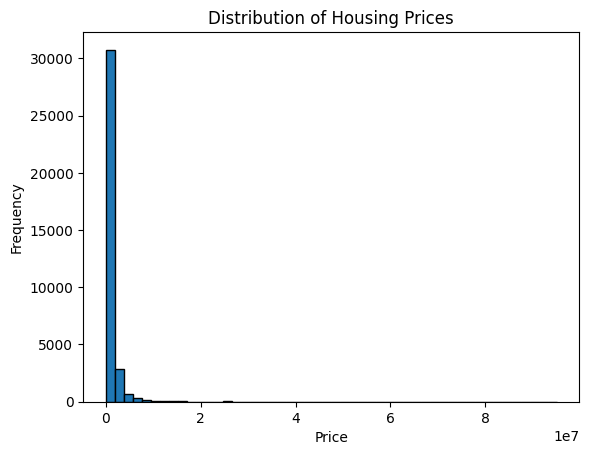

In [16]:
import matplotlib.pyplot as plt

# Plotting the distribution of housing prices
plt.hist(data_cleaned['price'], bins=50, edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


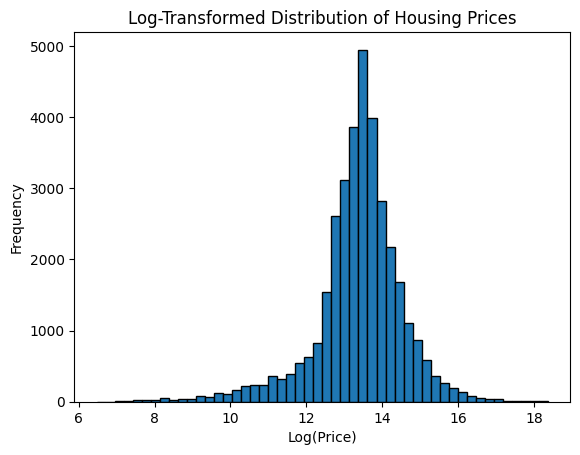

In [17]:
import numpy as np

# Apply log transformation to prices to reduce skewness
log_prices = np.log1p(data_cleaned['price'])  # np.log1p ensures log(0) works properly

# Plotting the log-transformed distribution of housing prices
plt.hist(log_prices, bins=50, edgecolor='black')
plt.title('Log-Transformed Distribution of Housing Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

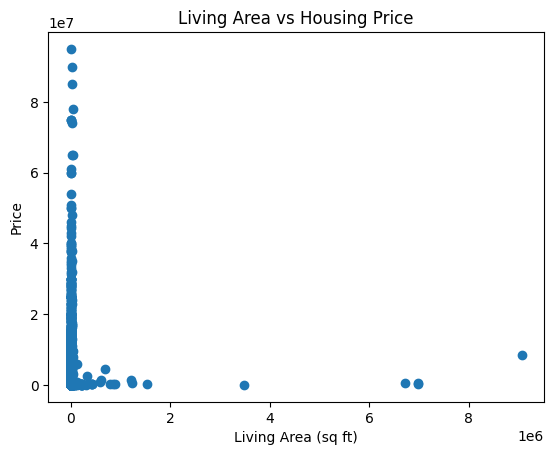

In [19]:
# Scatter plot for living area vs price
plt.scatter(data_cleaned['livingArea'], data_cleaned['price'])
plt.title('Living Area vs Housing Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.show()

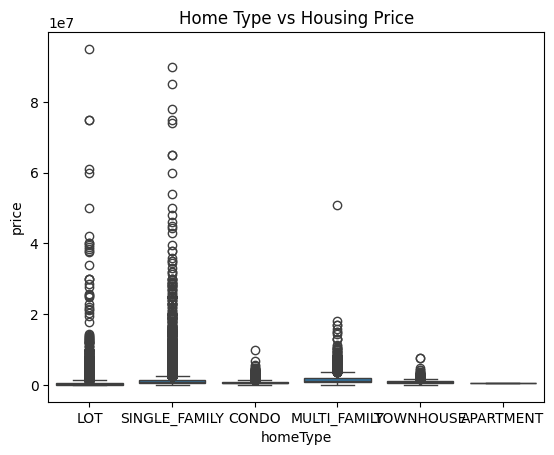

In [20]:
# Box plot for home type vs price
sns.boxplot(x='homeType', y='price', data=data_cleaned)
plt.title('Home Type vs Housing Price')
plt.show()

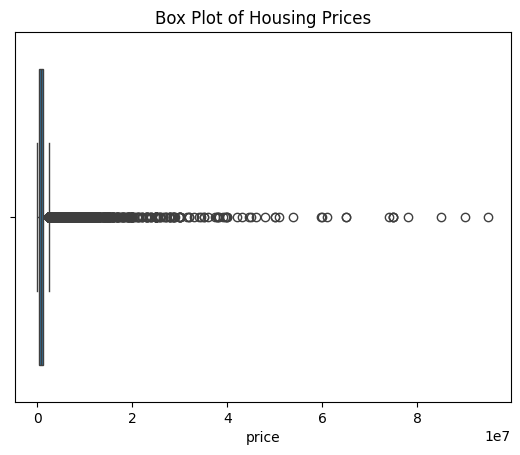

In [21]:
# box plot of housing prices

import seaborn as sns
sns.boxplot(x=data_cleaned['price'])
plt.title('Box Plot of Housing Prices')
plt.show()